# Research on apartment sales ads

We will have the data from a real estate agency. It is an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. We’ll need to learn how to determine the market value of real estate properties. This will make it possible to build an automated system that is capable of detecting anomalies and fraudulent activity.

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. For example, the distance from the city center, airport, the nearest park or body of water. 

### Step 1. Open the data file and study the general information. 

In [1]:
#Let’s read the table from the csv file and then check: what we have in the table:
from nltk.stem import SnowballStemmer
import datetime
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns

import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


real_estate = pd.read_csv('/datasets/real_estate_data_us.csv', sep='\t')
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
date_posted          23699 non-null object
days_listed          20518 non-null float64
last_price           23699 non-null float64
bedrooms             23699 non-null int64
kitchen_area         21421 non-null float64
living_area          21796 non-null float64
total_area           23699 non-null float64
balconies            12180 non-null float64
ceiling_height       14504 non-null float64
floors_total         23613 non-null float64
floor                23699 non-null int64
total_images         23699 non-null int64
bike_parking         2775 non-null object
is_studio            23699 non-null bool
is_open_plan         23699 non-null bool
locality_name        23650 non-null object
airport_dist         18157 non-null float64
city_center_dist     18180 non-null float64
park_dist            8079 non-null float64
parks_within_3000    18181 non-null float64
pond_dist            9110 no

In [2]:
display(real_estate.head())

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
0,2019-03-07T00:00:00,NaN,260000.0,3,25.0,51.0,108.0,NaN,2.70,16.0,...,NaN,False,False,Saint Petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0
1,2018-12-04T00:00:00,81.0,67000.0,1,11.0,18.6,40.4,2.0,NaN,11.0,...,NaN,False,False,Shushary village,12817.0,18603.0,NaN,0.0,NaN,0.0
2,2015-08-20T00:00:00,558.0,103920.0,2,8.3,34.3,56.0,0.0,NaN,5.0,...,NaN,False,False,Saint Petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0
3,2015-07-24T00:00:00,424.0,1298000.0,3,NaN,NaN,159.0,0.0,NaN,14.0,...,NaN,False,False,Saint Petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0
4,2018-06-19T00:00:00,121.0,200000.0,2,41.0,32.0,100.0,NaN,3.03,14.0,...,NaN,False,False,Saint Petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0


In [3]:
real_estate.describe()

,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
count,20518.000000,2.369900e+04,23699.000000,21421.000000,21796.000000,23699.000000,12180.000000,14504.000000,23613.000000,23699.000000,23699.000000,18157.000000,18180.000000,8079.000000,18181.000000,9110.000000,18181.000000
mean,180.888634,1.308310e+05,2.070636,10.569807,34.457852,60.348651,1.150082,2.771499,10.673824,5.892358,9.858475,28793.672193,14191.277833,490.804555,0.611408,517.980900,0.770255
std,219.727988,2.177403e+05,1.078405,5.905438,22.030445,35.654083,1.071300,1.261056,6.597173,4.885249,5.682529,12630.880622,8608.386210,342.317995,0.802074,277.720643,0.938346
min,1.000000,2.440000e+02,0.000000,1.300000,2.000000,12.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,181.000000,1.000000,0.000000,13.000000,0.000000
25%,45.000000,6.800000e+04,1.000000,7.000000,18.600000,40.000000,0.000000,2.520000,5.000000,2.000000,6.000000,18585.000000,9238.000000,288.000000,0.000000,294.000000,0.000000
50%,95.000000,9.300000e+04,2.000000,9.100000,30.000000,52.000000,1.000000,2.650000,9.000000,4.000000,9.000000,26726.000000,13098.500000,455.000000,0.000000,502.000000,1.000000
75%,232.000000,1.360000e+05,3.000000,12.000000,42.300000,69.900000,2.000000,2.800000,16.000000,8.000000,14.000000,37273.000000,16293.000000,612.000000,1.000000,729.000000,1.000000
max,1580.000000,1.526000e+07,19.000000,112.000000,409.700000,900.000000,5.000000,100.000000,60.000000,33.000000,50.000000,84869.000000,65968.000000,3190.000000,3.000000,1344.000000,3.000000


### Conclusion

Data set is saved as a real_estate variable. Its total length is 23699 rows, every row represents one listing, and 22 columns with characteristics of the given listing:
when it is posted - date_posted; for how long - days_listed; property details: last_price, bedrooms, kitchen_area, living_area, total_area, balconies, ceiling_height, floors_total, floor, total_images, is_studio, bike_parking; surrounding area details: is_open_plan, locality_name, airport_dist, city_center_dist, park_dist, parks_within_3000, pond_dist, ponds_within_3000.
Let's see the quality of the data, for example whether there are missing values and other peculiarities.

There is no missing values in the following columns (probably they were defined as mandatory fields):
- date_posted, last_price, bedrooms, total_area, floor, total_images, # calculated by platform (?) is_studio, is_open_plan.

Missing values that is suggested to replace 
- with 0 value in the following columns: balconies, bike_parking
- with 1 value in the bedrooms column 
- with median value: ceiling_height, floors_total; days_listed (*before review: kitchen_area and living_area)
- with calculated value: kitchen_area and living_area (average ratio of kitchen are to the total area multiplied by the total are of the given listing) (*after review)

For locality_name, we found that the most frequent value is "Saint Petersburg", all missing values suggested to replace with "Other" value. 
(*after review)
(*before review: thus, as this research is done for Saint Petersburg area, all missing values were replaced with this most frequent value.)

Missing values for derived attributes to keep as follows:
- keep as is - airport_dist, city_center_dist, park_dist, pond_dist
- fill based on park_dist and pond_dist in the following columns: ponds_within_3000, parks_within_3000.
    
Data type was changed for the below columns:
- date_posted --> from string to data format

### Step 2. Data preprocessing

In [4]:
#Let's start the preprocessing with missing values identification for every column using isnull() count():
print(real_estate[real_estate['locality_name'].isnull()].count())

#There is no missing values in the following columns (probably they were defined as mandatory fields):
## date_posted, last_price, bedrooms, total_area, floor, total_images, # calculated by platform (?) is_studio, is_open_plan.

#Missing values that is suggested to replace 
#with 0, midan, average or calculated value as described below in each case.

date_posted          49
days_listed          48
last_price           49
bedrooms             49
kitchen_area         40
living_area          44
total_area           49
balconies            43
ceiling_height       14
floors_total         48
floor                49
total_images         49
bike_parking         15
is_studio            49
is_open_plan         49
locality_name         0
airport_dist         41
city_center_dist     41
park_dist            15
parks_within_3000    41
pond_dist            25
ponds_within_3000    41
dtype: int64


In [5]:
#To see better what max/min etc. values we have in every column we use describe() function:
real_estate.describe()

,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
count,20518.000000,2.369900e+04,23699.000000,21421.000000,21796.000000,23699.000000,12180.000000,14504.000000,23613.000000,23699.000000,23699.000000,18157.000000,18180.000000,8079.000000,18181.000000,9110.000000,18181.000000
mean,180.888634,1.308310e+05,2.070636,10.569807,34.457852,60.348651,1.150082,2.771499,10.673824,5.892358,9.858475,28793.672193,14191.277833,490.804555,0.611408,517.980900,0.770255
std,219.727988,2.177403e+05,1.078405,5.905438,22.030445,35.654083,1.071300,1.261056,6.597173,4.885249,5.682529,12630.880622,8608.386210,342.317995,0.802074,277.720643,0.938346
min,1.000000,2.440000e+02,0.000000,1.300000,2.000000,12.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,181.000000,1.000000,0.000000,13.000000,0.000000
25%,45.000000,6.800000e+04,1.000000,7.000000,18.600000,40.000000,0.000000,2.520000,5.000000,2.000000,6.000000,18585.000000,9238.000000,288.000000,0.000000,294.000000,0.000000
50%,95.000000,9.300000e+04,2.000000,9.100000,30.000000,52.000000,1.000000,2.650000,9.000000,4.000000,9.000000,26726.000000,13098.500000,455.000000,0.000000,502.000000,1.000000
75%,232.000000,1.360000e+05,3.000000,12.000000,42.300000,69.900000,2.000000,2.800000,16.000000,8.000000,14.000000,37273.000000,16293.000000,612.000000,1.000000,729.000000,1.000000
max,1580.000000,1.526000e+07,19.000000,112.000000,409.700000,900.000000,5.000000,100.000000,60.000000,33.000000,50.000000,84869.000000,65968.000000,3190.000000,3.000000,1344.000000,3.000000


In [6]:
#Let's replace missing values with 0 value in the following columns: 
##balconies, bike_parking, bedrooms:

real_estate['balconies'] = pd.to_numeric(real_estate['balconies'], errors='coerce')
real_estate['balconies'] = real_estate['balconies'].fillna(0)
print(real_estate['balconies'].value_counts())

real_estate['bike_parking'] = pd.to_numeric(real_estate['bike_parking'], errors='coerce')
real_estate['bike_parking'] = real_estate['bike_parking'].fillna(0)
#print(real_estate[real_estate['balconies'].isnull()].count())
print(real_estate['bike_parking'].value_counts())

#print(real_estate.sort_values(by=['bike_parking'],ascending=False).tail(10))

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balconies, dtype: int64
0.0    23649
1.0       50
Name: bike_parking, dtype: int64


In [7]:
#Let's replace missing values with 1 value in the bedrooms column, 
#taking as an assumption the study is about places dedicated for living
#and there is at list one room in each listing (in case it is the only one there is an indicator is_studio):
real_estate['bedrooms'] = pd.to_numeric(real_estate['bedrooms'], errors='coerce')
real_estate['bedrooms'] = real_estate['bedrooms'].fillna(1)
print(real_estate['bedrooms'].value_counts())

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: bedrooms, dtype: int64


In [8]:
#Let's replace missing values of the kitchen_area with 
#the average ratio between the kitchen space and the total area (for all listings)
#multiplied by the total are of the given listing:

#First, let's calculate the ratio between the kitchen space and the total area
#and add this value to the new column ratio_kitchen_total_area:
real_estate['ratio_kitchen_total_area'] = real_estate['kitchen_area'] / real_estate['total_area']

#Then let's find out it's average value:
avg_ratio_kitchen_total_area = round(real_estate['ratio_kitchen_total_area'].mean(),2)
print(avg_ratio_kitchen_total_area)


#Third, let's fill null values of the kitchen_area multiplying total_area by avg_ratio_kitchen_total_area:
real_estate['kitchen_area'] = real_estate['kitchen_area'].fillna(real_estate['total_area'] * avg_ratio_kitchen_total_area)

#print(real_estate['kitchen_area'].value_counts())
print(real_estate.sort_values(by=['kitchen_area'], ascending=False).head())

0.19
               date_posted  days_listed  last_price  bedrooms  kitchen_area  \
19540  2017-12-06T00:00:00        106.0   8400000.0        12         112.0   
20215  2018-02-01T00:00:00         26.0   1700000.0         3         107.0   
2489   2017-04-21T00:00:00        102.0    250000.0         3         100.7   
5358   2019-02-14T00:00:00         14.0   1300000.0        15         100.0   
15016  2016-01-13T00:00:00        303.0   3000000.0         4          95.0   

       living_area  total_area  balconies  ceiling_height  floors_total  ...  \
19540        409.7       900.0        0.0             2.8          25.0  ...   
20215         72.0       249.7        4.0             NaN          10.0  ...   
2489         153.9       255.0        0.0             NaN           2.0  ...   
5358         409.0       590.0        0.0             3.5           6.0  ...   
15016          NaN       500.0        0.0             3.2           7.0  ...   

       is_studio  is_open_plan     loca

In [9]:
#Let's replace missing values of the living_area with 
#the average ratio between the living room and the total area (for all listings)
#multiplied by the total are of the given listing:

#First, let's calculate the ratio between the living room and the total area
#and add this value to the new column ratio_living_total_area:
real_estate['ratio_living_total_area'] = real_estate['living_area'] / real_estate['total_area']

#Then let's find out it's average value:
avg_ratio_living_total_area = round(real_estate['ratio_living_total_area'].mean(),2)
print(avg_ratio_living_total_area)


#Third, let's fill null values of the kitchen_area multiplying total_area by avg_ratio_kitchen_total_area:
real_estate['living_area'] = real_estate['living_area'].fillna(real_estate['total_area'] * avg_ratio_living_total_area)

print(real_estate.sort_values(by=['living_area'], ascending=False).head())
print(real_estate['living_area'].value_counts())

0.56
               date_posted  days_listed  last_price  bedrooms  kitchen_area  \
19540  2017-12-06T00:00:00        106.0   8400000.0        12         112.0   
5358   2019-02-14T00:00:00         14.0   1300000.0        15         100.0   
3117   2019-03-30T00:00:00          NaN   2800000.0         7          60.0   
12401  2017-06-19T00:00:00         14.0   1830000.0         7          25.0   
4237   2017-10-14T00:00:00          NaN   1000000.0         7          22.0   

       living_area  total_area  balconies  ceiling_height  floors_total  ...  \
19540       409.70       900.0        0.0            2.80          25.0  ...   
5358        409.00       590.0        0.0            3.50           6.0  ...   
3117        353.36       631.0        0.0             NaN           5.0  ...   
12401       347.50       495.0        0.0            4.65           7.0  ...   
4237        332.00       517.0        0.0             NaN           4.0  ...   

       is_open_plan     locality_name  

In [10]:
#Let's replace missing values with median value in the following columns:
##ceiling_height and floors_total:

print(round(real_estate.ceiling_height.median()))
print(round(real_estate.floors_total.median()))

real_estate['ceiling_height'] = real_estate['ceiling_height'].fillna(round(real_estate.ceiling_height.median()))
real_estate['floors_total'] = real_estate['floors_total'].fillna(round(real_estate.floors_total.median()))

print(real_estate['ceiling_height'].value_counts())
print(real_estate['floors_total'].value_counts())

3
9
3.00      10307
2.50       3515
2.60       1646
2.70       1574
2.80        993
          ...  
27.50         1
5.00          1
3.59          1
4.80          1
100.00        1
Name: ceiling_height, Length: 183, dtype: int64
5.0     5788
9.0     3847
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64


In [11]:
#Let's replace missing values with median value in the days_listed column to see how fast the property is sold:

print(round(real_estate.days_listed.median()))

real_estate['days_listed'] = real_estate['days_listed'].fillna(round(real_estate.days_listed.median()))

print(real_estate['days_listed'].value_counts())


95
95.0      3245
45.0       880
60.0       538
7.0        234
30.0       208
          ... 
1110.0       1
1135.0       1
951.0        1
693.0        1
773.0        1
Name: days_listed, Length: 1141, dtype: int64


In [12]:
#For locality_name, we see that the most frequent value is Saint Petersburg - 15721 rows: 
#print(real_estate['locality_name'].value_counts())

#***after review***
#for further analysis let's replace missing values with "Other" value and see what percent this represents:
real_estate['locality_name'] = real_estate['locality_name'].fillna('Other')

print('"Other" municipality that replaced missing values represents: {:.1%}'.format(round((len(real_estate[real_estate['locality_name'] == 'Other'])/len(real_estate)),3)), 'of total number of listings.')
print('While the most frequent munisipality represents: {:.1%}'.format(round((len(real_estate[real_estate['locality_name'] == 'Saint Petersburg'])/len(real_estate)),3)), 'of total number of listings.')

#***before review***
#as this research is done for Saint Petersburg area, 
#let's replace with this value all missing values:
#real_estate['locality_name'] = real_estate['locality_name'].fillna(locality_name)
#print(real_estate['locality_name'].value_counts())
#locality_name = real_estate['locality_name'].value_counts().argmax()
#print(locality_name)


"Other" municipality that replaced missing values represents: 0.2% of total number of listings.
While the most frequent munisipality represents: 66.3% of total number of listings.


In [13]:
#Let's see whether there is a dependancy what areas has no airport/park/city center/pond
#and then decide how to replace missing values in those columns:
#    - airport_dist, city_center_dist, park_dist, pond_dist:

#Let's create a pivot_table 'lacality_mean_distance' in order to find out average distance for every licality 
#for airport, city center, park and pond in the relevant columns:

lacality_mean_distance = real_estate.pivot_table(index='locality_name', values= ('airport_dist', 'city_center_dist', 'park_dist', 'pond_dist'), aggfunc='mean')

#Every column of the table will have the relevant name 
#'avg_airport_dist', 'avg_city_cente_dist', 'avg_park_dist', 'avg_pond_dist':
lacality_mean_distance.columns = ['avg_airport_dist', 'avg_city_cente_dist', 'avg_park_dist', 'avg_pond_dist']
print(lacality_mean_distance.sort_values(by='avg_airport_dist',ascending=True))



                          avg_airport_dist  avg_city_cente_dist  \
locality_name                                                     
Aleksandrovskaya village      12896.500000         27468.000000   
Shushary village              16061.458716         24243.387615   
Pushkin                       16447.869919         28745.375000   
village Petro-Slavyanka       20605.000000         27165.000000   
Pavlovsk                      21053.342105         33206.921053   
Other                         24572.341463         11278.902439   
Metallostroy village          25726.484848         27561.348485   
Kolpino                       26375.863501         32113.771513   
Ust-Izhora village            26510.500000         28222.500000   
Krasnoye Selo                 26595.579545         30020.284091   
Saint Petersburg              28046.186237         11601.291571   
Strelna village               28148.363636         23376.113636   
Pontonny village              30581.400000         32293.45000

In [14]:

#Missing values for derived attributes were decided to keep as is in order not to impact the statistics:
#- airport_dist, city_center_dist, park_dist, pond_dist
real_estate['airport_dist'] = pd.to_numeric(real_estate['airport_dist'], errors='coerce')
real_estate['city_center_dist'] = pd.to_numeric(real_estate['city_center_dist'], errors='coerce')
real_estate['park_dist'] = pd.to_numeric(real_estate['park_dist'], errors='coerce')
real_estate['pond_dist'] = pd.to_numeric(real_estate['pond_dist'], errors='coerce')

In [15]:
#Let's check how looks our updated pivot table based on locality and distance to the airport, park, city_center and pond:
real_estate.pivot_table(index='locality_name', values= ('airport_dist', 'city_center_dist', 'park_dist', 'pond_dist'), aggfunc='mean')

#We can see that number of areas has null for parks and ponds, probably the reason is there is no park or pond. 
#It is suggested to keep those null values.

,airport_dist,city_center_dist,park_dist,pond_dist
locality_name,,,,
Aleksandrovskaya village,12896.500000,27468.000000,NaN,711.500000
Beloostrov village,57769.000000,38868.000000,NaN,320.000000
Kolpino,26375.863501,32113.771513,495.481203,532.268421
Krasnoye Selo,26595.579545,30020.284091,466.086957,445.500000
Kronshtadt,67469.263158,49195.726316,324.574713,343.413793
Levashovo village,52693.000000,25727.000000,NaN,NaN
Lisiy Nos village,55302.333333,27613.333333,NaN,NaN
Lomonosov,48308.280303,50739.969697,389.062500,550.048193
Metallostroy village,25726.484848,27561.348485,NaN,NaN


In [16]:
#Let's replace mssing values for the following columns:
# ponds_within_3000, parks_within_3000, 
#based on park_dist and pond_dist accordingly:

print(real_estate.query('pond_dist <= 3000')['ponds_within_3000'].value_counts())
real_estate.query('pond_dist <= 3000')['ponds_within_3000'].fillna(1)
real_estate.query('pond_dist > 3000')['ponds_within_3000'].fillna(0)

print(real_estate['ponds_within_3000'].value_counts())

1.0    5717
2.0    1892
3.0    1501
Name: ponds_within_3000, dtype: int64
0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_within_3000, dtype: int64


In [17]:
#Let's replace mssing values for the following columns:
# ponds_within_3000, parks_within_3000, 
#based on park_dist and pond_dist accordingly:

print(real_estate.query('park_dist <= 3000')['parks_within_3000'].value_counts())
real_estate.query('park_dist <= 3000')['parks_within_3000'].fillna(1)
real_estate.query('park_dist > 3000')['parks_within_3000'].fillna(0)

print(real_estate['parks_within_3000'].value_counts())


1.0    5681
2.0    1747
3.0     647
Name: parks_within_3000, dtype: int64
0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_within_3000, dtype: int64


In [18]:
#For further convenience, let's convert date_posted from 'non-null object' to date format:
real_estate['date_posted'] = pd.to_datetime(real_estate['date_posted'], format='%Y-%m-%dT%H:%M:%S')
print(real_estate.head())


  date_posted  days_listed  last_price  bedrooms  kitchen_area  living_area  \
0  2019-03-07         95.0    260000.0         3         25.00        51.00   
1  2018-12-04         81.0     67000.0         1         11.00        18.60   
2  2015-08-20        558.0    103920.0         2          8.30        34.30   
3  2015-07-24        424.0   1298000.0         3         30.21        89.04   
4  2018-06-19        121.0    200000.0         2         41.00        32.00   

   total_area  balconies  ceiling_height  floors_total  ...  is_open_plan  \
0       108.0        0.0            2.70          16.0  ...         False   
1        40.4        2.0            3.00          11.0  ...         False   
2        56.0        0.0            3.00           5.0  ...         False   
3       159.0        0.0            3.00          14.0  ...         False   
4       100.0        0.0            3.03          14.0  ...         False   

      locality_name  airport_dist  city_center_dist  park_dist

### Conclusion

Missing values that were replaced replace 
- with 0 value in the following columns: balconies, bike_parking
- with 1 value in the bedrooms column 
- with median value: ceiling_height, floors_total; days_listed 
- with calculated value: kitchen_area and living_area (average ratio of kitchen are to the total area multiplied by the total are of the given listing)

For locality_name, we found that the most frequent value is "Saint Petersburg" - 66%, all missing values suggested to replace with "Other" value - 0.2%. 

Missing values for derived attributes were kept for:
- airport_dist, city_center_dist, park_dist, pond_dist

Based on park_dist and pond_dist the following columns were filled with 1 if distance is less than 3000: ponds_within_3000, parks_within_3000, otherwise with 0.
    
Data type was changed for the below columns:
- date_posted --> from string to data format

### Step 3. Make calculations and add them to the table

In [19]:
#Let's calculate the price per square meter and add this value to the new price_per_square_meter column:
real_estate['price_per_square_meter'] = real_estate['last_price'] / real_estate['total_area']
#print(real_estate.head())

In [20]:
#Let's create a column day_of_the_week_posted and put there the day of the week that the ad was published:
real_estate['day_of_the_week_posted'] = real_estate['date_posted'].dt.weekday
#print(real_estate.head())

In [21]:
#Let's create a column month_posted and put there the month that the ad was published:
real_estate['month_posted'] = real_estate['date_posted'].dt.month
#print(real_estate.head())

In [22]:
#Let's create a column year_posted and put there the year that the ad was published:
real_estate['year_posted'] = real_estate['date_posted'].dt.year
#print(real_estate.head())

In [23]:
#Let's find out which floor the apartment is on (first, last, or other):

def floor_apartment_group(row):
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1 :
        return 'last'
    elif floor == floors_total :
        return 'first'
    return 'other'

real_estate['floor_apartment_group'] = real_estate.apply(floor_apartment_group, axis=1)
print(real_estate['floor_apartment_group'].value_counts())  
#print(real_estate.head())

other    17441
first     3341
last      2917
Name: floor_apartment_group, dtype: int64


### Conclusion

Following data was calculated and added to the dedicated columns:
- the price per square meter:
    - price_per_square_meter
        
- the day of the week, month, and year that the ad was published, accordingly:
    - day_of_the_week_posted, month_posted, year_posted
    
- which floor the apartment is on (first, last, or other):
    - floor_apartment_group
    
- the ratio between the living space and the total area, as well as between the kitchen space and the total area, accordingly:
    - ratio_living_total_area, ratio_kitchen_total_area

### Step 4. Conduct exploratory data analysis and follow the instructions below:

In [24]:
#Let's investigate the following parameters: 
#square area, price, number of rooms, and ceiling height. 
real_estate[['total_area', 'last_price', 'bedrooms', 'ceiling_height']].describe()

#We can see that the 
#- average for the square area is 60 m2, with max surface of 900 m2 and min surface of 12m2.
#- average for the price is 130 831, with max price of 15 260 000 and min price of 244.
#- average for the number of rooms is 2, with max value of 19 rooms and min value of 0.
#- average for the ceiling height is 2.9m, with max value of 100m and min value of 1m (both values worth checking).

#Then let's plot a histogram for each parameter.

,total_area,last_price,bedrooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,23699.000000
mean,60.348651,1.308310e+05,2.070636,2.860155
std,35.654083,2.177403e+05,1.078405,0.992788
min,12.000000,2.440000e+02,0.000000,1.000000
25%,40.000000,6.800000e+04,1.000000,2.600000
50%,52.000000,9.300000e+04,2.000000,2.950000
75%,69.900000,1.360000e+05,3.000000,3.000000
max,900.000000,1.526000e+07,19.000000,100.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b8ad22b90>]],
      dtype=object)

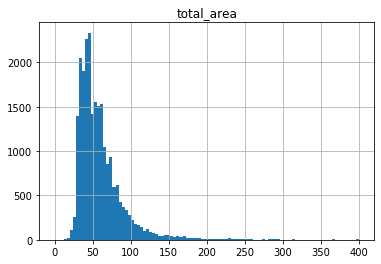

In [25]:
#total_area
real_estate.hist('total_area', bins = 100, range= (0, 400))
#There is a sharp spike around 40m2. There are few outliers between 200m2 and 400ms2.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b80ec0550>]],
      dtype=object)

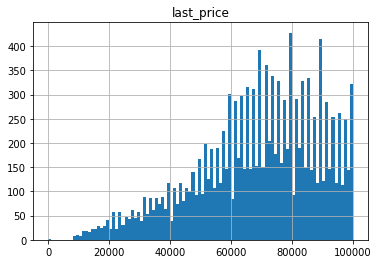

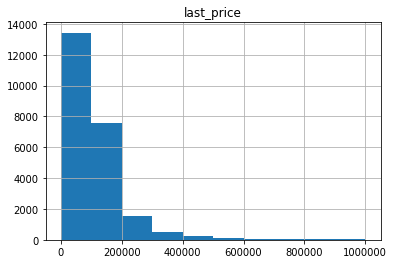

In [26]:
#last_price
real_estate.hist('last_price',  bins = 100, range= (1e2, 1e5))
#In order to see the data more in details, let's choose 100 bins 
#and the price range from 100 to 100 000 (1e2, 1e5):
#There is a sharp spike around the price of 80 000. 

#if we choose to change our range to a max value of 1e7 we'll get the following:
real_estate.hist('last_price',  bins = 10, range= (1e2, 1e6))

#Most of the entries sit at 0.1 of 1e7 scale - means in between the price of 0 and 1 000 000 
#the same as on previous histagram.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b80387750>]],
      dtype=object)

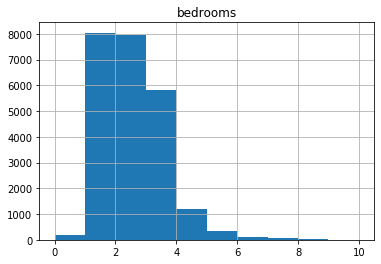

In [27]:
#bedrooms
real_estate.hist('bedrooms',  range= (0, 10))
#We can see that most of listings has 1 to 3 rooms.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b8035cd90>]],
      dtype=object)

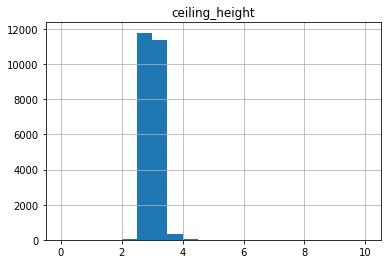

In [28]:
#ceiling_height
real_estate.hist('ceiling_height',  bins = 20, range= (0, 10))
#We can see that most common hight for the ceiling is between 2 and 4 meters that is pretty obvious.

### Conclusion

During our investigation of the following parameters: **square area, price, number of rooms, and ceiling height** we found that:
- average for the square area is 60 m2, with max surface of 900 m2 and min surface of 12m2.
- average for the price is 131 830, with max price of 15 260 000 and min price of 244.
- average for the number of rooms is 2, with max value of 19 rooms and min value of 0.
- average for the ceiling height is 2.8m, with max value of 100m and min value of 1m (both values worth checking).

After that we plot a histogram for each parameter. Regarding the square area, there is a sharp spike around 40m2. There are few outliers between 200m2 and 400ms2.

Regarding the price, there is a raise in histagram around the price of 80 000. Most of the entries sit at 0.1 of 1e7 scale - means in between the price of 0 and 1 000 000.

While studying the histagram for the number of rooms, we found that most of listings has 1 to 3 rooms.
We can see that most common hight for the ceiling is between 2 and 4 meters that is pretty obvious.


In [29]:
#Let's examine the time it's taken to sell the apartment and plot a histogram. 
#For this purpose, we'll calculate the mean and median:
print('Mean time to sell the apartment:', round(real_estate['days_listed'].mean()), 'days.')
print('Median time to sell the apartment:', real_estate['days_listed'].median(), 'days.')

#The average sale period is 169 days (~5.5 months) while for median listing it is 95 days that is half a year, close to the 75% of listings.

real_estate['days_listed'].describe()
#For 25% of sales it took 45 to commplete the sale that is pretty fast, while min value of 1 looks more like an error.
#For 75% it took almost 200 days that is more than half a year, 
#while the max value is 1580 that is more than 4 years and also can be considered as an error.

Mean time to sell the apartment: 169 days.
Median time to sell the apartment: 95.0 days.


count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_listed, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b8029d910>]],
      dtype=object)

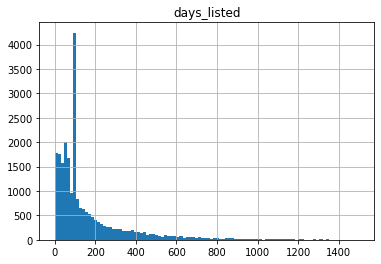

In [30]:
real_estate.hist('days_listed',  bins = 100, range= (0, 1500))

#on our histogram we can see a nice slope between 100 and 300 days, 
#while a spike is around 100 days and unique data between 1200 and 1400 days.

In [31]:
# real_estate.hist('days_listed',  bins = 100, range= (30, 100))

### Conclusion

In addition, we examined the **time it's taken to sell the apartment** and plot a histogram. 
The average sale period is 95 days (~3 months) while for median listing it is 195 days that is half a year, close to the 75% of listings.
For 25% of sales it took 45 to commplete the sale that is pretty fast, while min value of 1 looks more like an error.
For 75% it took almost 200 days that is more than half a year, while the max value is 1580 that is more than 4 years and also can be considered as an error.

On our histogram we also found a nice slope between 100 and 300 days, with a spike around 100 days and unique data between 1200 and 1400 days.

In [32]:
#Let's remove rare and outlying values, describe the patterns and save it into a new table real_estate_clean.

#- total_area (10 m2 - 300 m2)
#- last_price (10 000 - 1 000 000)
#- bedrooms (below 9 rooms)
#- ceiling_height (2m - 4m)
#- days_listed (below 1000 days)

real_estate_clean = real_estate.query('10 <= total_area <= 300 & 1e+04 <= last_price <= 1e+06 & bedrooms <= 9 & 2<=ceiling_height <=4 & days_listed <= 1000')

real_estate_clean.info()
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23181 entries, 0 to 23698
Data columns (total 29 columns):
date_posted                 23181 non-null datetime64[ns]
days_listed                 23181 non-null float64
last_price                  23181 non-null float64
bedrooms                    23181 non-null int64
kitchen_area                23181 non-null float64
living_area                 23181 non-null float64
total_area                  23181 non-null float64
balconies                   23181 non-null float64
ceiling_height              23181 non-null float64
floors_total                23181 non-null float64
floor                       23181 non-null int64
total_images                23181 non-null int64
bike_parking                23181 non-null float64
is_studio                   23181 non-null bool
is_open_plan                23181 non-null bool
locality_name               23181 non-null object
airport_dist                17714 non-null float64
city_center_dist            17

In [33]:
#Let's see what percentage it represents from initial table:
print('That represents {:.0%}'.format(len(real_estate_clean)/len(real_estate)), 'of initial data.')

That represents 98% of initial data.


In [34]:
real_estate_clean.describe()


,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,...,park_dist,parks_within_3000,pond_dist,ponds_within_3000,ratio_kitchen_total_area,ratio_living_total_area,price_per_square_meter,day_of_the_week_posted,month_posted,year_posted
count,23181.000000,23181.000000,23181.000000,23181.000000,23181.000000,23181.000000,23181.000000,23181.000000,23181.000000,23181.000000,...,7810.000000,17735.000000,8801.000000,17735.000000,20959.000000,21332.000000,23181.000000,23181.000000,23181.000000,23181.000000
mean,156.924205,118501.697985,2.043398,10.370382,33.521970,58.571658,0.593676,2.826533,10.708339,5.905526,...,490.875416,0.600789,522.166572,0.756921,0.187808,0.564636,1949.418812,2.571287,6.397610,2017.398171
std,175.561671,96107.134095,1.019743,5.369760,18.537699,28.506813,0.959936,0.240801,6.593036,4.890761,...,338.942729,0.792060,278.117068,0.929301,0.072657,0.105102,781.678585,1.790222,3.486658,1.008311
min,1.000000,10000.000000,0.000000,1.300000,2.000000,12.000000,0.000000,2.000000,1.000000,1.000000,...,1.000000,0.000000,13.000000,0.000000,0.025381,0.038462,192.307692,0.000000,1.000000,2014.000000
25%,45.000000,68000.000000,1.000000,7.000000,19.000000,40.000000,0.000000,2.600000,5.000000,2.000000,...,288.000000,0.000000,298.000000,0.000000,0.133803,0.495023,1529.411765,1.000000,3.000000,2017.000000
50%,95.000000,92000.000000,2.000000,9.000000,30.000000,51.700000,0.000000,2.900000,9.000000,4.000000,...,456.000000,0.000000,506.000000,0.000000,0.172736,0.567797,1895.734597,3.000000,6.000000,2017.000000
75%,190.000000,133800.000000,3.000000,12.000000,42.000000,68.800000,1.000000,3.000000,16.000000,8.000000,...,612.750000,1.000000,733.000000,1.000000,0.232635,0.637681,2272.727273,4.000000,10.000000,2018.000000
max,1000.000000,1000000.000000,9.000000,100.700000,225.900000,297.500000,5.000000,4.000000,60.000000,33.000000,...,3190.000000,3.000000,1344.000000,3.000000,0.787879,1.000000,16969.696970,6.000000,12.000000,2019.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b7ffa5450>]],
      dtype=object)

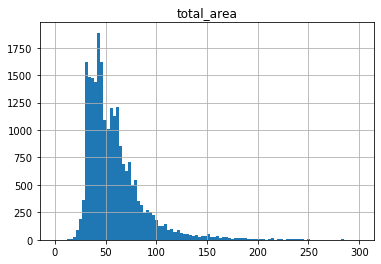

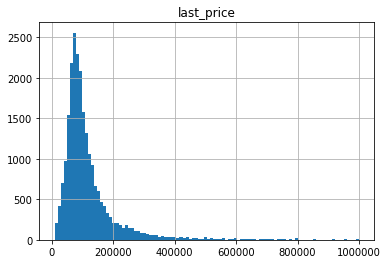

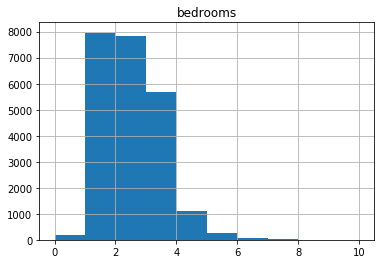

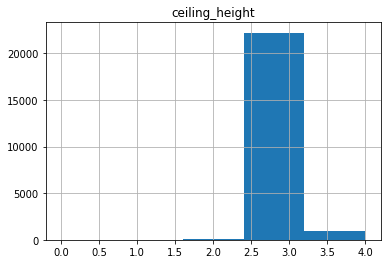

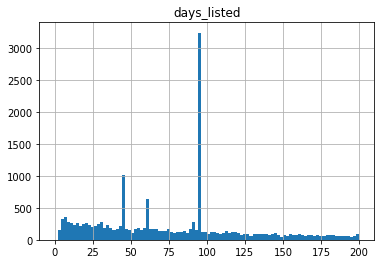

In [35]:
#In this case our histagrams will look like as follows:

real_estate_clean.hist('total_area', bins = 100, range= (0, 300))
real_estate_clean.hist('last_price',  bins = 100, range= (1e4, 1e6))
real_estate_clean.hist('bedrooms',  range= (0, 10))
real_estate_clean.hist('ceiling_height',  bins = 5, range= (0, 4))
real_estate_clean.hist('days_listed',  bins = 100, range= (0, 200))


In [36]:
#we can see a shar spike next to: 
#- total area of 45 m2
#- price around 80 000
#- 1-2 bedrooms
#- 2.3 and 3.2 m for ceiling_height
#- days_listed around 90 days.

#We removed only 2% of our data due to their outling values that should keep our analysis pretty reliable. 

In [37]:
real_estate_clean.head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,parks_within_3000,pond_dist,ponds_within_3000,ratio_kitchen_total_area,ratio_living_total_area,price_per_square_meter,day_of_the_week_posted,month_posted,year_posted,floor_apartment_group
0,2019-03-07,95.0,260000.0,3,25.0,51.0,108.0,0.0,2.70,16.0,...,1.0,755.0,2.0,0.231481,0.472222,2407.407407,3,3,2019,other
1,2018-12-04,81.0,67000.0,1,11.0,18.6,40.4,2.0,3.00,11.0,...,0.0,NaN,0.0,0.272277,0.460396,1658.415842,1,12,2018,last
2,2015-08-20,558.0,103920.0,2,8.3,34.3,56.0,0.0,3.00,5.0,...,1.0,574.0,2.0,0.148214,0.612500,1855.714286,3,8,2015,other
4,2018-06-19,121.0,200000.0,2,41.0,32.0,100.0,0.0,3.03,14.0,...,2.0,48.0,1.0,0.410000,0.320000,2000.000000,1,6,2018,other
5,2018-09-10,55.0,57800.0,1,9.1,14.4,30.4,0.0,3.00,12.0,...,NaN,NaN,NaN,0.299342,0.473684,1901.315789,0,9,2018,other


### Conclusion

As part of our analysis we removed rare and outlying values and saved it into a new table real_estate_clean. Thus we kept the following ranges:
- total_area (10 m2 - 300 m2)
- last_price (10 000 - 1 000 000)
- bedrooms (below 9 rooms)
- ceiling_height (2m - 4m)
- days_listed (below 1000 days)

The data after the cleaning looked as follows, there is a shar spike next to: 
- total area of 45 m2
- price around 80 000
- 1-2 bedrooms
- 2.3 and 3.2 m for ceiling_height
- days_listed around 90 days.

We removed only 2% of our data due to their outling values that should keep our analysis pretty reliable (as this is less than 5%). 

In [38]:
#Now let's find out which factors have had the biggest influence on an apartment’s price? 
#First, let's examine whether the value depends on 
#- price per meter, number of rooms, floor (top or bottom), or the proximity to the downtown area. 

#Let's check the correlation between those elements:
real_estate_clean[['last_price', 'price_per_square_meter', 'bedrooms', 'floor_apartment_group', 'city_center_dist']].corr()

,last_price,price_per_square_meter,bedrooms,city_center_dist
last_price,1.000000,0.701411,0.495254,-0.333625
price_per_square_meter,0.701411,1.000000,-0.027804,-0.371676
bedrooms,0.495254,-0.027804,1.000000,-0.172377
city_center_dist,-0.333625,-0.371676,-0.172377,1.000000


In [39]:
#We can see that the strongest correlation is between the listing price and the price per meter 70%, 
#then 50% correlation is between price and bedrooms and then 
#negative correlation of 33% is between city center distance and the price (closer to the center is more expensive - logical).

In [40]:
#Let's examine whether the value depends on 
#- the publication date: day of the week, month, and year. 

#Let's check the relation between those elements with pivot_table function:
(real_estate_clean.pivot_table(index=('day_of_the_week_posted','month_posted','year_posted'), values= ('last_price'), aggfunc='sum').sort_values(by='last_price',ascending=False)).head(3)
#We can see that the highest sum price was posted on Thursdays; in Februaries; in 2018.


,,,last_price
day_of_the_week_posted,month_posted,year_posted,
3,2,2018,59861460.0
4,11,2017,40527780.0
0,4,2019,28830287.0


### Conclusion

We found out which factors have had the biggest influence on an **apartment’s price** : 
- price per meter, number of rooms, floor (top or bottom), or the proximity to the downtown area?
    - The strongest correlation is between the listing price and the price per meter 70%, then 50% correlation is between price and bedrooms and then negative correlation of 33% is between city center distance and the price (closer to the center is more expensive - logical).
- the publication date: day of the week, month, and year
    - The relation between those elements was checked with pivot_table function and we found that the highest sum price was posted on Thursdays; in February's; in 2018.


In [41]:
#Let's select 10 places with the largest number of ads and save it in the locality table 
#(then for those 10 places we'll calculate the average price per square meter, 
# select the locations with the highest and lowest housing prices):
locality=(real_estate_clean.pivot_table(index=('locality_name',), values= ('last_price'), aggfunc='count').sort_values(by='last_price',ascending=False)).head(10)
locality.columns=['ads count']
print(locality)

                   ads count
locality_name               
Saint Petersburg       15309
Murino village           549
Shushary village         436
Vsevolozhsk              393
Pushkin                  359
Kolpino                  335
Pargolovo village        326
Gatchina                 306
Kudrovo village          294
Vyborg                   235


In [42]:
#let's calculate the average price per square meter in these municipalities and save it in locality_ppm table:
locality_ppm = (real_estate_clean[['price_per_square_meter','locality_name']].where(real_estate_clean['locality_name'].isin(locality.index)))
#print(locality_ppm)
print(locality_ppm['locality_name'].value_counts())

locality_ppm.pivot_table(index='locality_name', values= ('price_per_square_meter'), aggfunc='mean').sort_values(by='price_per_square_meter',ascending=False)

#Saint Petersburg is followed by Pushkin and Kudrovo village in a top 3 areas per average price_per_square_meter. 


Saint Petersburg     15309
Murino village         549
Shushary village       436
Vsevolozhsk            393
Pushkin                359
Kolpino                335
Pargolovo village      326
Gatchina               306
Kudrovo village        294
Vyborg                 235
Name: locality_name, dtype: int64


,price_per_square_meter
locality_name,
Saint Petersburg,2241.357445
Pushkin,2063.310052
Kudrovo village,1848.430500
Pargolovo village,1802.062731
Murino village,1715.285136
Shushary village,1572.316151
Kolpino,1505.594165
Gatchina,1375.153561
Vsevolozhsk,1373.014054


In [43]:
#Let's select the locations with the highest and lowest housing prices based on price per square meter in these municipalities:
print(locality_ppm.pivot_table(index='locality_name', values= ('price_per_square_meter'), aggfunc='max').sort_values(by='price_per_square_meter',ascending=False))
print(locality_ppm.pivot_table(index='locality_name', values= ('price_per_square_meter'), aggfunc='min').sort_values(by='price_per_square_meter',ascending=True))

#As we can see top 3 locations with most expensive prices per m2: Saint Petersburg, Vsevolozhsk, Pushkin.
#While 3 locations with less expensive prices per m2: Gatchina, Saint Petersburg, Vyborg.

                   price_per_square_meter
locality_name                            
Saint Petersburg             16969.696970
Vsevolozhsk                  12808.447009
Pushkin                       5130.434783
Shushary village              2956.521739
Gatchina                      2926.315789
Kudrovo village               2857.142857
Murino village                2771.604938
Pargolovo village             2770.448549
Kolpino                       2500.000000
Vyborg                        2149.462366
                   price_per_square_meter
locality_name                            
Gatchina                       210.144928
Saint Petersburg               306.905371
Vyborg                         375.000000
Vsevolozhsk                    628.000000
Pargolovo village              784.119107
Shushary village               954.008322
Kolpino                        959.147425
Murino village                1000.000000
Kudrovo village               1083.206934
Pushkin                       1196

### Conclusion

Then we selected 10 places with the largest number of ads and calculated the average price per square meter in these municipalities:
- Saint Petersburg
- Murino village          
- Shushary village         
- Vsevolozhsk              
- Pushkin                  
- Kolpino                  
- Pargolovo village        
- Gatchina                 
- Kudrovo village          
- Vyborg                   

When we selected locations with the highest and lowest housing prices: 
- among the most expensive prices per m2: Saint Petersburg, Vsevolozhsk, Pushkin.
- among less expensive prices per m2: Gatchina, Saint Petersburg, Vyborg.


In [44]:
#Let's look at apartment offers: 
#Each apartment has information about the distance to the downtown area city_center_dist (in meters). 
#Here we'll select apartments in Saint Petersburg (‘locality_name’): 
spb_downtown=real_estate_clean.query('locality_name == "Saint Petersburg"')
spb_downtown=spb_downtown[['locality_name', 'city_center_dist','last_price', 'total_area', 'bedrooms', 'ceiling_height', 'date_posted', 'floor']]


print(spb_downtown)
print(spb_downtown['locality_name'].value_counts())


          locality_name  city_center_dist  last_price  total_area  bedrooms  \
0      Saint Petersburg           16028.0    260000.0      108.00         3   
2      Saint Petersburg           13933.0    103920.0       56.00         2   
4      Saint Petersburg            8098.0    200000.0      100.00         2   
7      Saint Petersburg           11634.0    158300.0       71.60         2   
9      Saint Petersburg           15008.0    108000.0       61.00         3   
...                 ...               ...         ...         ...       ...   
23689  Saint Petersburg           16081.0     71000.0       35.30         1   
23690  Saint Petersburg            6263.0    110000.0       52.00         2   
23691  Saint Petersburg            4489.0    189400.0       72.90         2   
23694  Saint Petersburg            4232.0    194000.0      133.81         3   
23697  Saint Petersburg           10364.0    229500.0       76.75         2   

       ceiling_height date_posted  floor  
0       

In [45]:
#Let's find which area is considered to be downtown. 
#For this let's create a column with the distance to the downtown area in km and round to the nearest whole number: 
spb_downtown['city_center_km'] = round(spb_downtown['city_center_dist'] / 1000)
#print(spb_downtown['city_center_km'].value_counts())


In [46]:
#Next, let's calculate the average price for each kilometer by dividing last_price per city_center_km:
spb_downtown['city_center_pricePerKm'] = round(spb_downtown['last_price'] / spb_downtown['city_center_km'])
print(spb_downtown['city_center_pricePerKm'].value_counts())

#plot a graph to display how prices are affected by the distance to the downtown area. 
#Define the turning point where the graph significantly changes, which will indicate downtown

6000.0     142
10000.0    107
7000.0     101
8000.0      95
6500.0      67
          ... 
13218.0      1
16362.0      1
16997.0      1
71200.0      1
8811.0       1
Name: city_center_pricePerKm, Length: 4968, dtype: int64


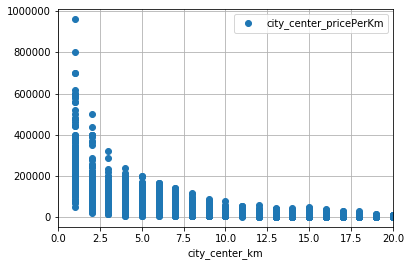

In [47]:
#Let's plot a graph to display how prices are affected by the distance to the downtown area:
spb_downtown.plot(x='city_center_km', y='city_center_pricePerKm',style='o',grid=True, xlim=(0, 20))

#when we limit km (x axis) to 20, we can see that price/km drop below 200 000 after 5km.
#This can be defined as turning point what might indicate downtown area.
#***after review: data without correction of municipality missing values to SPB

### Conclusion

As the next part of our analysis we looked at apartment offers: each apartment has information about the distance to the downtown area city_center_dist (in meters). First, we selected apartments in Saint Petersburg (‘locality_name’) and put it into new table spb_downtown. 
As the next step, we found which area is considered to be downtown. We created a column city_center_km with the distance to the downtown area in km and rounded to the nearest whole number. Then we calculated the price per kilometer by dividing last_price per city_center_km and plot a graph to display how prices are affected by the distance to the downtown area. Finding a turning point on this graph we see that the price per kilometer drops below 200 000 when distance goes higher than 5km, thus, we might consider this as a downtown area.

 

In [48]:
#Let's take a deeper look at our segment of apartments in the downtown - spb_downtown table in order to 
#analyze this area and examine the following parameters: 
#square area (total_area), price (last_price), number of rooms (bedrooms), ceiling height.

spb_downtown[['last_price', 'total_area', 'bedrooms', 'ceiling_height']].corr()

#We see there is a 80% correlation between the price and the square area of the listing; 52% based on bedrooms and 32% based on ceiling.


,last_price,total_area,bedrooms,ceiling_height
last_price,1.000000,0.798901,0.522104,0.329682
total_area,0.798901,1.000000,0.793055,0.329871
bedrooms,0.522104,0.793055,1.000000,0.183929
ceiling_height,0.329682,0.329871,0.183929,1.000000


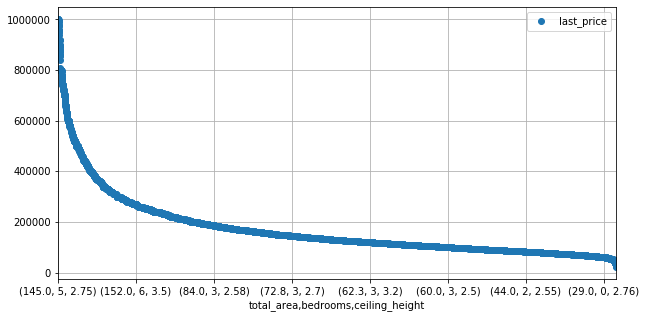

In [49]:
spb_downtown.pivot_table(index=('total_area', 'bedrooms', 'ceiling_height'), values= 'last_price', aggfunc='median').sort_values(by='last_price', ascending=False).plot(style='o',grid=True, legend=True, figsize = (10, 5))
#The most expencive will be 145m2 5 bedroom apartment with 2.75m ceiling hight.

In [50]:
#Also identify the factors that affect an apartment’s price:
#number of rooms (bedrooms), floor, distance to the downtown area (city_center_km), and ad publication date (date_posted):

spb_downtown[['last_price', 'city_center_km', 'bedrooms', 'floor']].corr()

,last_price,city_center_km,bedrooms,floor
last_price,1.000000,-0.401761,0.522104,0.006577
city_center_km,-0.401761,1.000000,-0.277523,0.224028
bedrooms,0.522104,-0.277523,1.000000,-0.165715
floor,0.006577,0.224028,-0.165715,1.000000


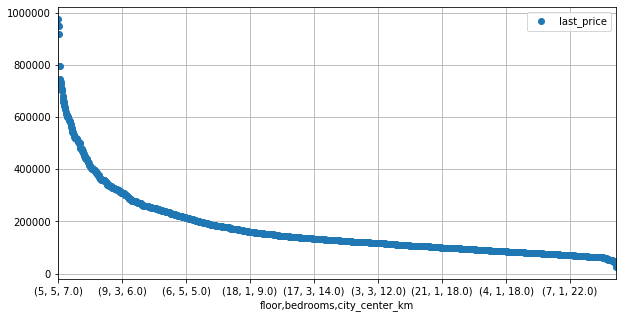

In [51]:
spb_downtown.pivot_table(
    index=
    ('floor', 'bedrooms', 'city_center_km'), values= 'last_price', aggfunc='median'
                        ).sort_values(by='last_price', ascending=False
                                     ).plot(style='o',grid=True, legend=True, figsize = (10, 5))
#On the other hand, the most expencive (based on the median) will be 5 bedroom apartment, situated on the 5th floor, 7 km from the downtown.

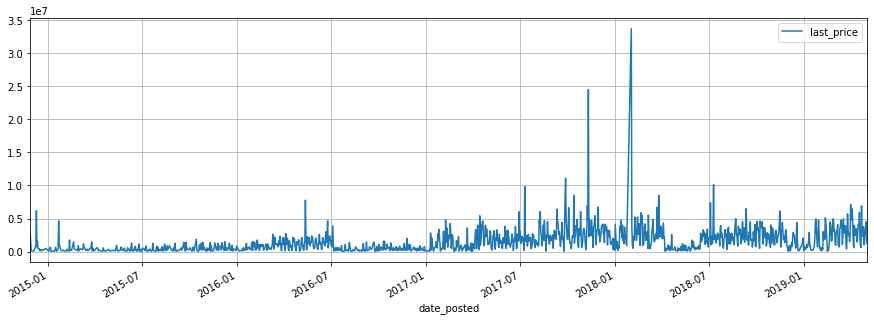

In [52]:
spb_downtown.pivot_table(index=('date_posted'), values= 'last_price', aggfunc='sum').sort_values(by='last_price', ascending=False).plot(style='-',grid=True, legend=True, figsize = (15, 5))
#The best selling period was in end 2017 beginning 2018 year with almost 25M and 34M sales. 
#In general the sales are going up for the SPB region since 2015.

### Conclusion

We had a deeper look at our segment of apartments in the downtown of St Petersburg and examined the following parameters: square area (total_area), price (last_price), number of rooms (bedrooms), ceiling height. There is an 80% correlation between the price and the square area of the listing; 52% based correlation on the number of bedrooms and 32% based on the ceiling hight. The most expencive will be 166m2 4 bedroom apartment with 3m ceiling hight. 
On the other hand, the most expencive (based on the median) will be 5 bedroom apartment, situated on the 5th floor, 7 km from the downtown. The best selling period was in end 2017 beginning 2018 year with almost 25M and 34M sales. 
In general the sales are going up for the SPB region since 2015.



### Step 5. Overall conclusion

There is a data set real_estate_data_us.csv that was examined in this project. It consists of 23699 rows, we suppose that every row represents a listing in a real estate agency - an apartment. 
For those listing we had to investigate following parameters in order to find out what factors have had the biggest influence on an apartment’s price.

Outlying values were filtered out (2% of the initial set) and further analysis was done based on this new table.

During our investigation we found that most of the apartments on sale:
- are around 45m2 
- cost around 80 000, in general, the apartments cost less than 1 000 000
- has 1 to 2 rooms
- common hight for the ceiling is between 2.3 and 3.2 meters.
- sold within 90 days (~3 months), while in general it takes between 100 and 300 days.

We found out that the strongest correlation is between the listing price and the price per meter 70%, then 50% correlation is between price and bedrooms and then negative correlation of 33% is from downtown distance and the price (closer to the centre is more expensive - logical).

The highest sales were brought by ads posted on Thursdays; in February's; in 2018.
The largest number of ads were posted on those top 10 municipalities: Saint Petersburg, Murino village, Shushary village, Vsevolozhsk, Pushkin, Kolpino, Pargolovo village, Gatchina, Kudrovo village, Vyborg.                   

Among the most expensive prices per m2: Saint Petersburg, Vsevolozhsk, Pushkin.
Among less expensive prices per m2: Gatchina, Saint Petersburg, Vyborg.

As the next part of our analysis we looked at apartment offers in Saint Petersburg:
- The price per kilometre drops below 200 000 when distance to the downtown is more than 5km
- There is an 80% correlation between the price and the square area of the listing; 50% based correlation on the number of bedrooms and 30% based on the ceiling hight. 
- The most expensive will be 145m2 5 bedroom apartment with 2.8m ceiling hight. 
- On the other hand, the most expensive (based on the median) will be 5 bedroom apartment, situated on the 5th floor, 7 km from the downtown
- The best selling period was in end 2017 beginning 2018 year with almost 25M and 34M sales. In general the sales are going up for the SPB region since 2015.

**Below you can find more details regarding data preprocessing.**

Data set is saved as a real_estate variable. Its total length is 23699 rows, every row represents one listing, and 22 columns with characteristics of the given listing:
Predefined columns: 
when it is posted - date_posted; for how long - days_listed; property details: last_price, bedrooms, kitchen_area, living_area, total_area, balconies, ceiling_height, floors_total, floor, total_images, is_studio, bike_parking; surrounding area details: is_open_plan, locality_name, airport_dist, city_center_dist, park_dist, parks_within_3000, pond_dist, ponds_within_3000.

Mandatory fields (as there is no missing values):
- date_posted, last_price, bedrooms, total_area, floor, total_images, is_studio, is_open_plan.

For analysis purposes following columns were created:
- the price per square meter: price_per_square_meter
        
- the day of the week, month, and year that the ad was published, accordingly: day_of_the_week_posted, month_posted, year_posted
    
- which floor the apartment is on (first, last, or other): floor_apartment_group
    
- the ratio between the living space and the total area, as well as between the kitchen space and the total area, accordingly: ratio_living_total_area, ratio_kitchen_total_area.
    
Missing values were replaced:
- with 0 value in the following columns: balconies, bike_parking
- with 1 value in the bedrooms column 
- with median value: kitchen_area and living_area; ceiling_height, floors_total; days_listed. 

For locality_name, we found that the most frequent value is "Saint Petersburg", thus, as this research is done for Saint Petersburg area, all missing values were replaced with this most frequent value.

Missing values for derived attributes were replaced as follows:
- with average distance value for the given locality: airport_dist, city_center_dist, park_dist, pond_dist (*null values kept for dist_park and dist_pond where those are true for the whole area (locality))
- based on park_dist and pond_dist in the following columns: ponds_within_3000, parks_within_3000.
    
Data type was changed for the below columns:
- date_posted --> from string to data format

As part of our analysis we removed rare and outlying values and saved it into a new table real_estate_clean with following ranges:
- total_area (10 m2 - 300 m2)
- last_price (10 000 - 1 000 000)
- bedrooms (below 9 rooms)
- ceiling_height (2m - 4m)
- days_listed (below 1000 days)


We removed only 2% of our data due to their outlying values that should keep our analysis more reliable (as this is less than 5%). 